In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import re

# demos=pd.read_csv('demographics.csv')
# demos.drop(demos[demos['Season']==2016].index, inplace=True)
# demos.drop(columns='Unnamed: 0', inplace=True, axis=1)
# demos.info()


I notice that for 2016, the column contain the names of positions instead of numbers. I am going to use height16edits.ipynb to make changes to that year and re-insert the data.

In [2]:
# sixteen=pd.read_csv('sixteen.csv')
# sixteen=sixteen.drop(columns='Unnamed: 0',axis=1)
# print(demos.columns)
# print(sixteen.columns)

In [3]:

# cols_sixteen = set(sixteen.columns)
# cols_demos = set(demos.columns)

# only_in_sixteen = cols_sixteen - cols_demos
# only_in_demos = cols_demos - cols_sixteen

# print("Columns in sixteen but not in demos:", only_in_sixteen)
# print("Columns in demos but not in sixteen:", only_in_demos)
# demos=demos.drop(columns=only_in_demos, axis=1)

In [4]:
# demos.head()

In [5]:
# demofinal=pd.merge(sixteen, demos, on=['Season','TeamName','Size','SizeRank','Hgt5','Hgt5Rank','Hgt4','Hgt4Rank','Hgt3','Hgt3Rank','Hgt2','Hgt2Rank','Hgt1','Hgt1Rank','HgtEff','HgtEffRank','Exp','ExpRank','Bench','BenchRank','Pts5','Pts5Rank','Pts4','Pts4Rank','Pts3','Pts3Rank','Pts2','Pts2Rank','Pts1','Pts1Rank','OR5','OR5Rank','OR4','OR4Rank','OR3','OR3Rank','OR2','OR2Rank','OR1','OR1Rank','DR5','DR5Rank','DR4','DR4Rank','DR3','DR3Rank','DR2','DR2Rank','DR1','DR1Rank'], how='outer')

In [6]:
# demofinal.to_csv('finalheights.csv')

In [7]:
demofinal=pd.read_csv('finalheights.csv')

In [8]:
demofinal=demofinal[demofinal.columns.drop(list(demofinal.filter(regex='Rank')))]
demofinal.head()

,Unnamed: 0,Season,TeamName,Size,Hgt5,Hgt4,Hgt3,Hgt2,Hgt1,HgtEff,...,OR5,OR4,OR3,OR2,OR1,DR5,DR4,DR3,DR2,DR1
0,0,2007,Air Force,77.00,-0.69,-0.06,1.07,1.32,2.47,-0.75,...,21.74,25.11,18.12,24.00,11.03,23.29,24.96,18.92,14.67,18.17
1,1,2007,Akron,75.76,-1.52,0.47,-2.08,-1.85,0.47,-1.05,...,27.05,28.40,31.45,7.71,5.38,22.97,24.52,28.40,12.05,12.05
2,2,2007,Alabama,77.65,0.52,0.26,2.07,1.39,0.31,0.78,...,23.41,37.60,22.21,11.41,5.36,32.71,29.21,17.16,12.68,8.24
3,3,2007,Alabama A&M,77.01,1.75,-1.17,0.07,1.15,1.47,0.58,...,25.17,29.00,11.99,15.91,17.92,34.37,21.22,13.70,15.21,15.49
4,4,2007,Alabama St.,76.28,-1.16,-0.26,1.07,1.20,-1.53,-1.42,...,28.95,30.34,17.95,17.56,5.20,29.66,24.80,14.84,13.82,16.88


In [9]:
demofinal.drop(columns='Unnamed: 0')

,Season,TeamName,Size,Hgt5,Hgt4,Hgt3,Hgt2,Hgt1,HgtEff,Exp,...,OR5,OR4,OR3,OR2,OR1,DR5,DR4,DR3,DR2,DR1
0,2007,Air Force,77.00,-0.69,-0.06,1.07,1.32,2.47,-0.75,2.61000,...,21.74,25.11,18.12,24.00,11.03,23.29,24.96,18.92,14.67,18.17
1,2007,Akron,75.76,-1.52,0.47,-2.08,-1.85,0.47,-1.05,2.09000,...,27.05,28.40,31.45,7.71,5.38,22.97,24.52,28.40,12.05,12.05
2,2007,Alabama,77.65,0.52,0.26,2.07,1.39,0.31,0.78,1.41000,...,23.41,37.60,22.21,11.41,5.36,32.71,29.21,17.16,12.68,8.24
3,2007,Alabama A&M,77.01,1.75,-1.17,0.07,1.15,1.47,0.58,0.77000,...,25.17,29.00,11.99,15.91,17.92,34.37,21.22,13.70,15.21,15.49
4,2007,Alabama St.,76.28,-1.16,-0.26,1.07,1.20,-1.53,-1.42,1.91000,...,28.95,30.34,17.95,17.56,5.20,29.66,24.80,14.84,13.82,16.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,2025,Wright St.,76.63,-1.39,-0.73,0.26,-0.52,-0.49,-1.06,2.00172,...,26.22,41.45,20.16,5.34,6.81,28.67,25.95,19.71,13.53,12.12
6666,2025,Wyoming,77.75,0.36,0.22,0.89,0.39,0.88,0.29,1.80689,...,36.19,33.38,16.20,10.61,3.59,23.34,19.66,27.31,18.98,10.65
6667,2025,Xavier,77.30,0.09,0.91,0.24,0.04,-0.80,0.50,3.53178,...,36.35,29.24,19.17,8.25,6.99,27.81,22.29,23.11,14.70,12.09
6668,2025,Yale,77.74,-0.73,-0.58,0.89,1.64,1.44,-0.65,1.66222,...,34.66,27.31,22.18,6.20,9.59,16.18,24.71,20.32,17.02,21.76


In [10]:
demofinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6670 entries, 0 to 6669
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6670 non-null   int64  
 1   Season      6670 non-null   int64  
 2   TeamName    6670 non-null   object 
 3   Size        6670 non-null   float64
 4   Hgt5        6670 non-null   float64
 5   Hgt4        6670 non-null   float64
 6   Hgt3        6670 non-null   float64
 7   Hgt2        6670 non-null   float64
 8   Hgt1        6670 non-null   float64
 9   HgtEff      6670 non-null   float64
 10  Exp         6670 non-null   float64
 11  Bench       6670 non-null   float64
 12  Pts5        6670 non-null   float64
 13  Pts4        6670 non-null   float64
 14  Pts3        6670 non-null   float64
 15  Pts2        6670 non-null   float64
 16  Pts1        6670 non-null   float64
 17  OR5         6670 non-null   float64
 18  OR4         6670 non-null   float64
 19  OR3         6670 non-null  

In [11]:
demofinal=demofinal[demofinal['Size'] !=0]
demofinal.drop(columns='Unnamed: 0', inplace=True, axis=1)

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/1264671601.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax=plt.subplots()


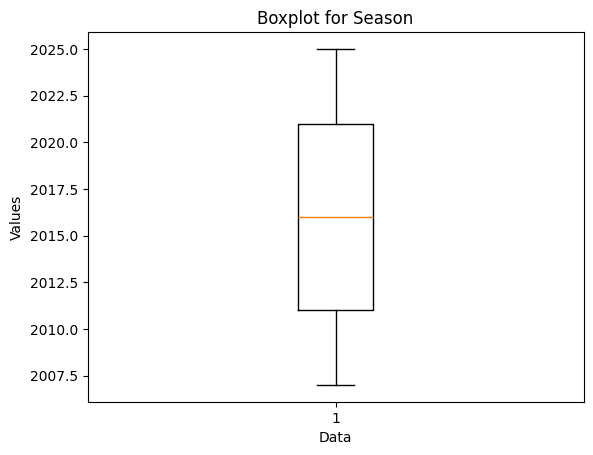

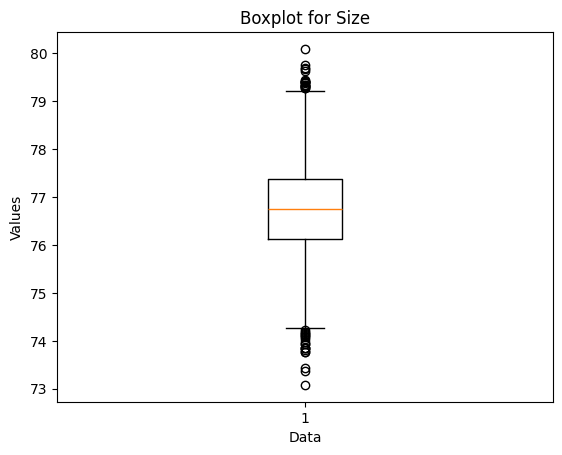

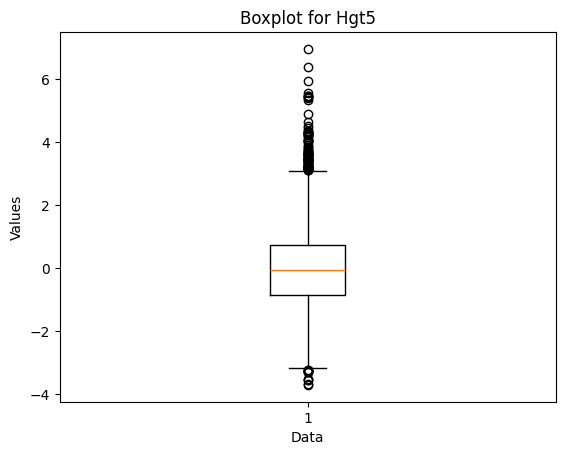

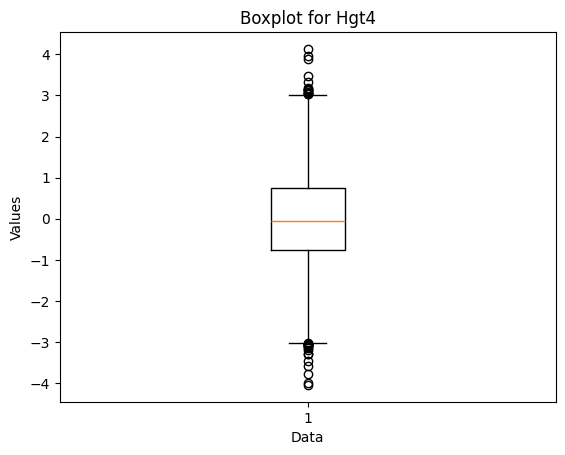

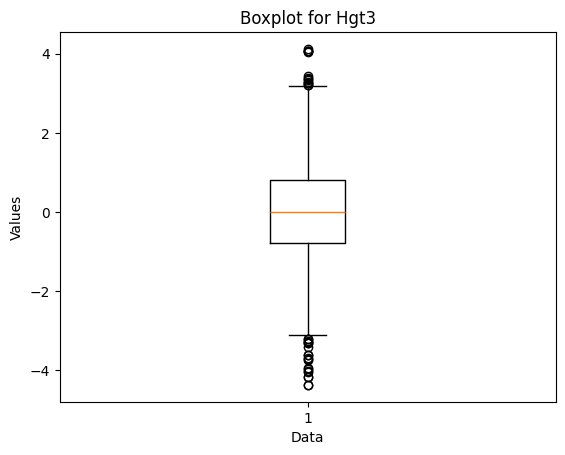

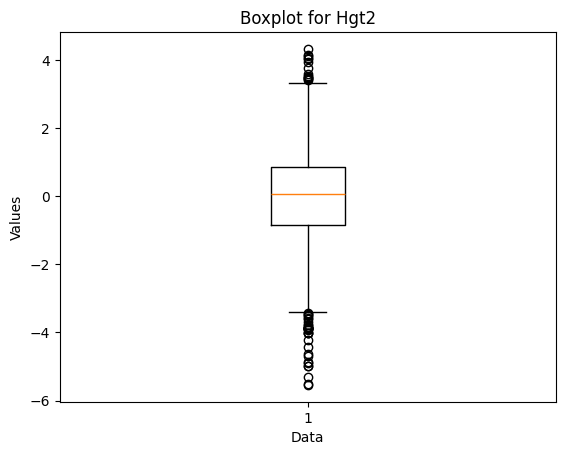

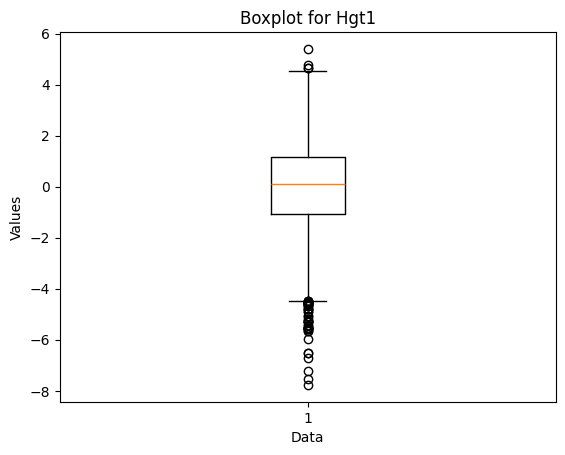

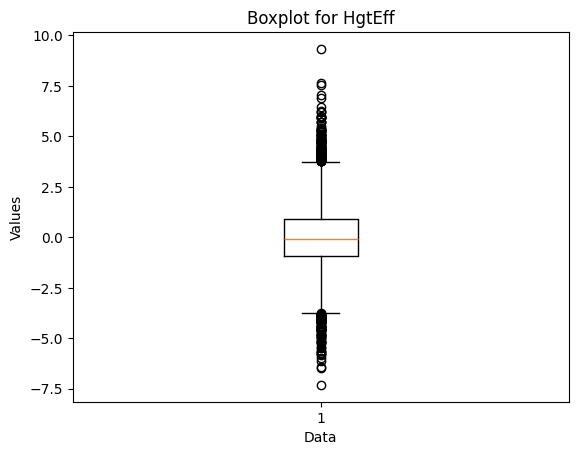

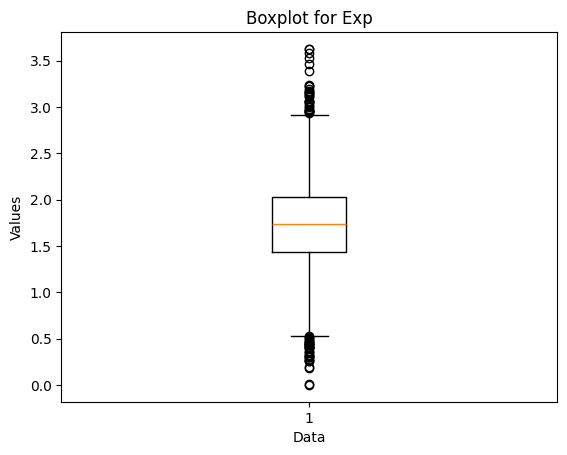

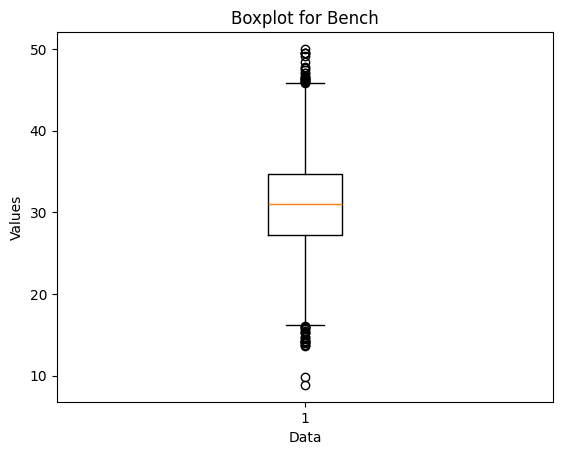

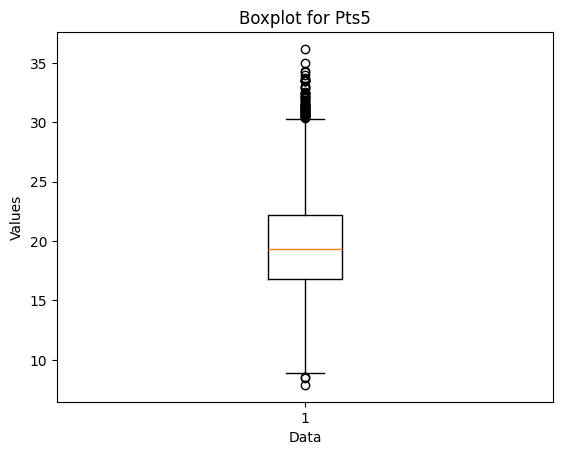

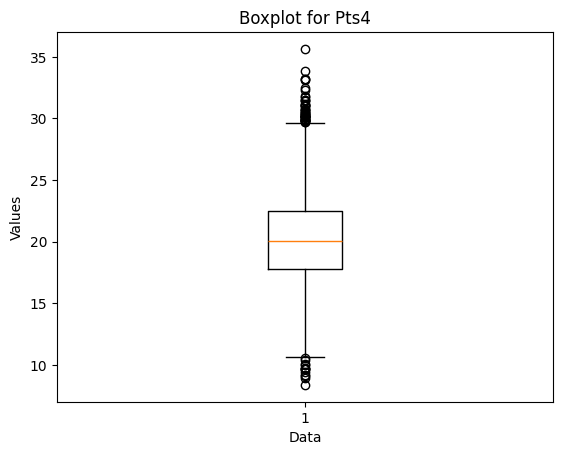

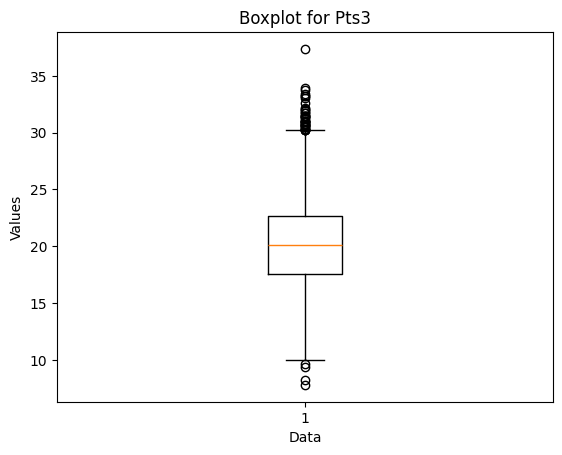

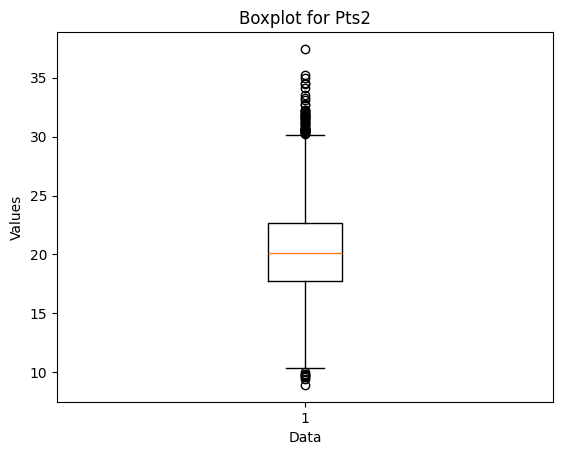

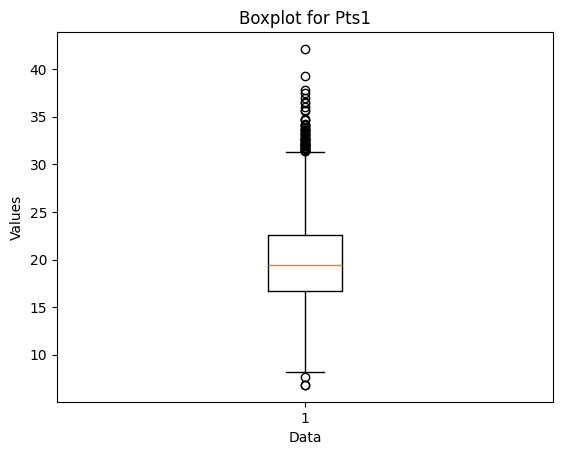

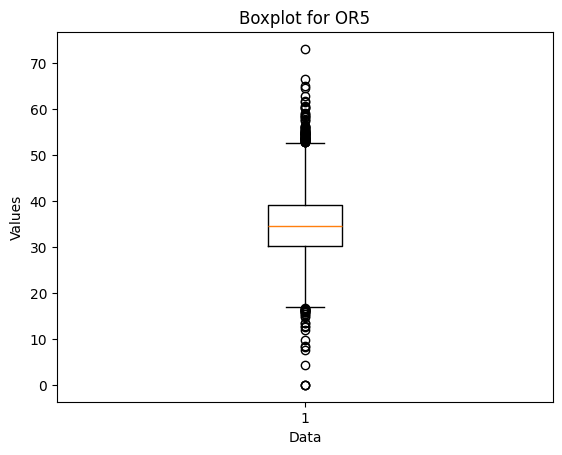

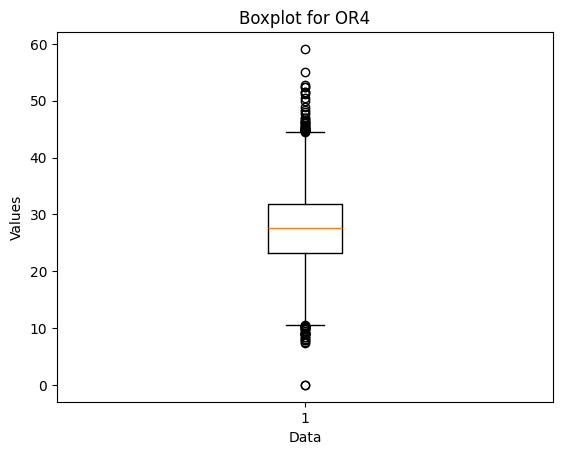

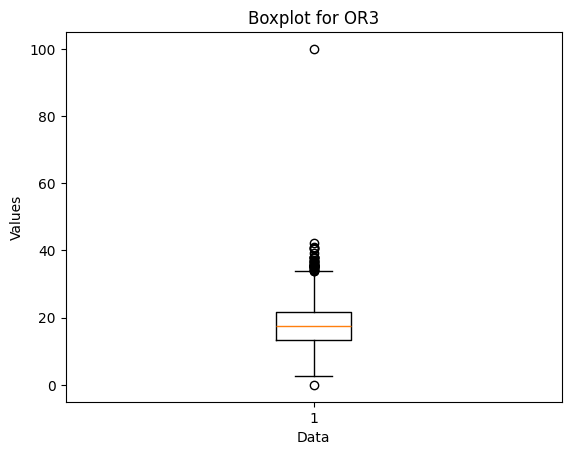

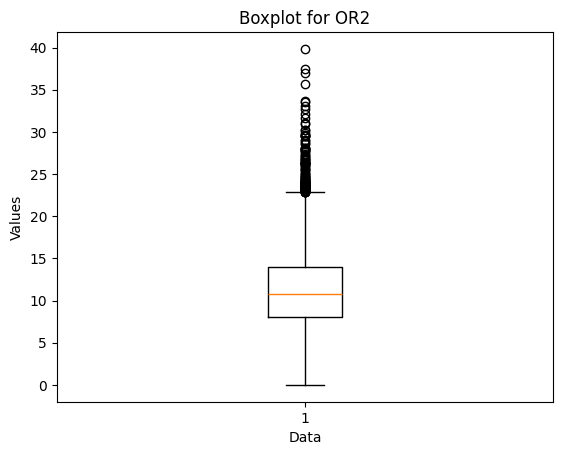

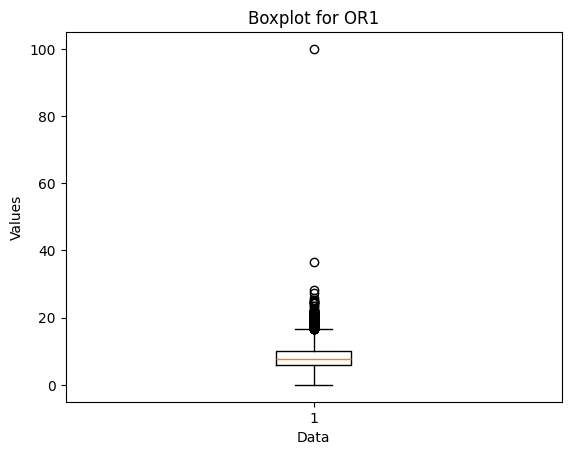

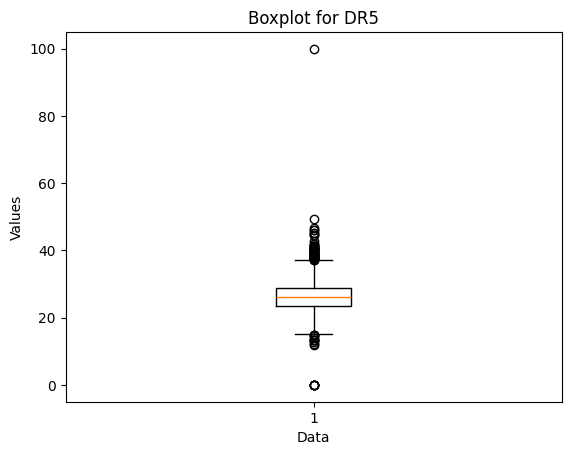

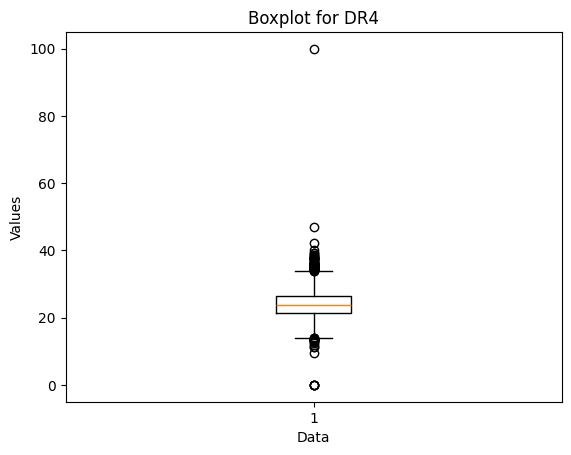

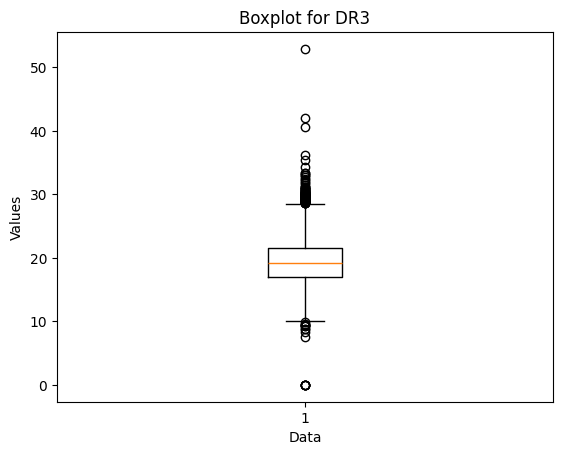

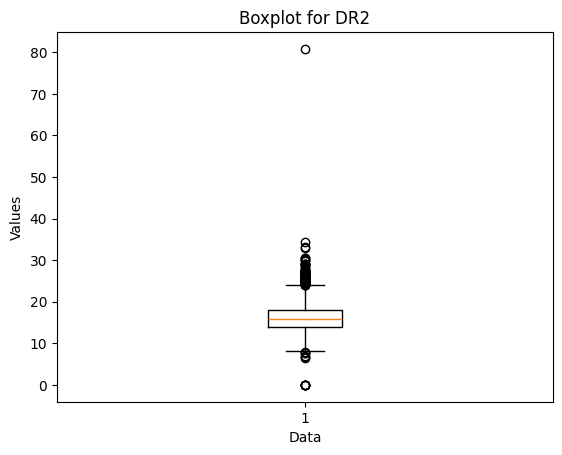

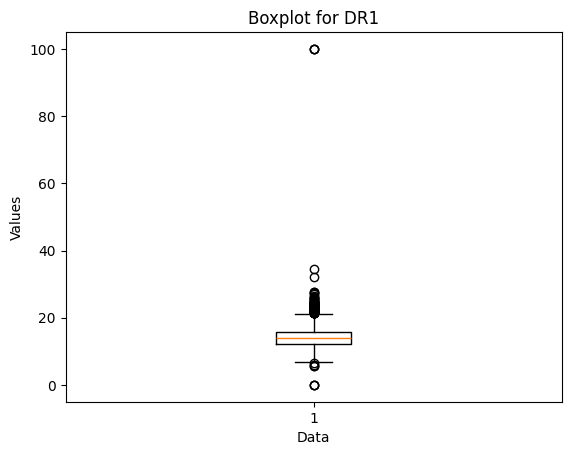

In [12]:
numerical=demofinal.select_dtypes(exclude='object')
for col in numerical:
    fig, ax=plt.subplots()
    ax.boxplot(numerical[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


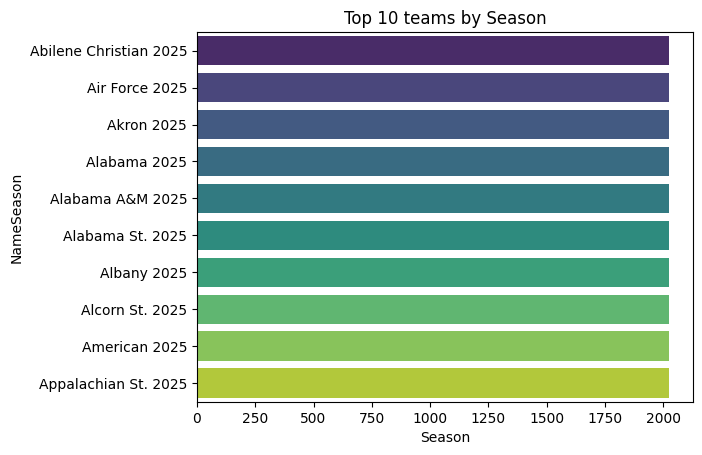

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


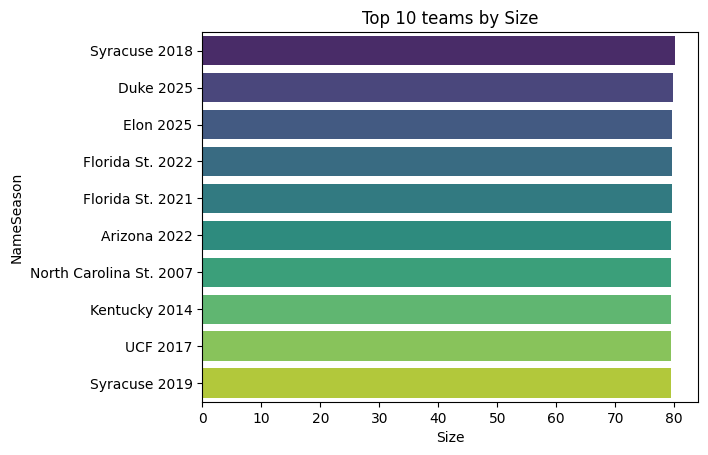

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


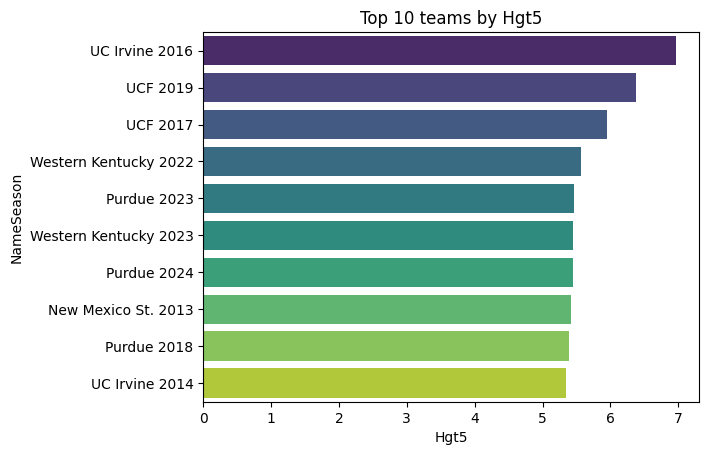

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


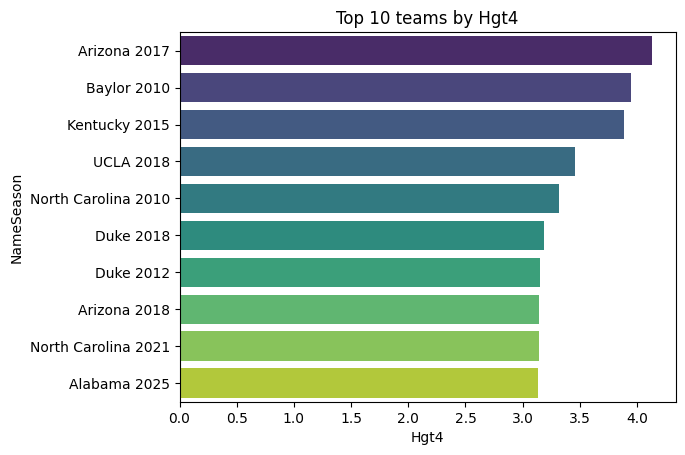

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


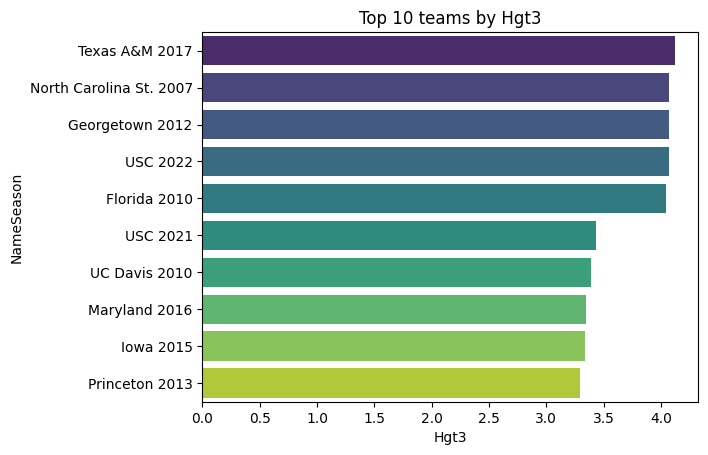

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


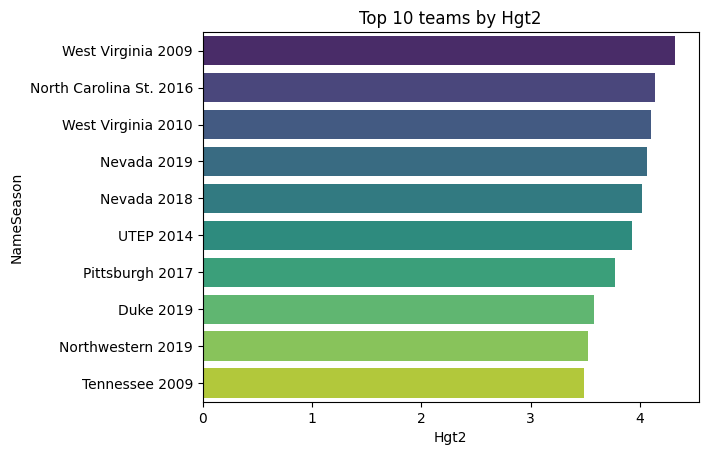

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


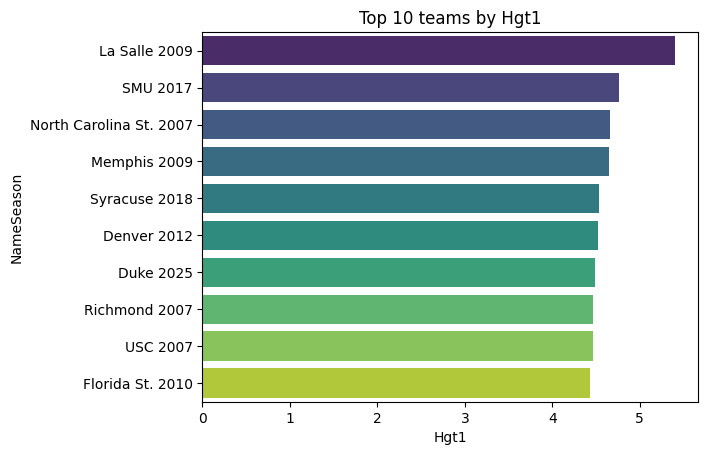

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


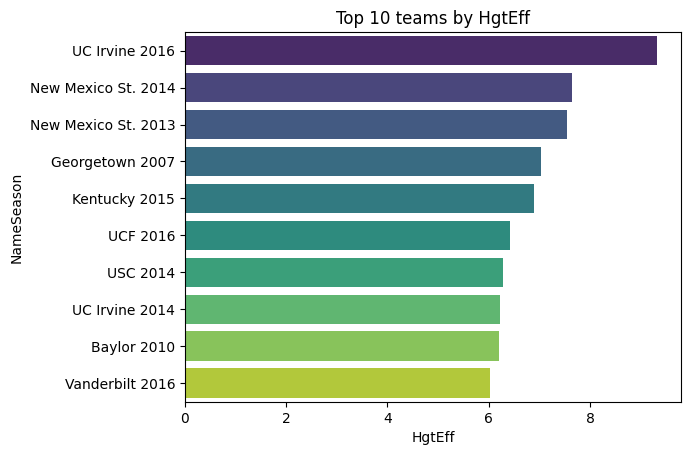

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


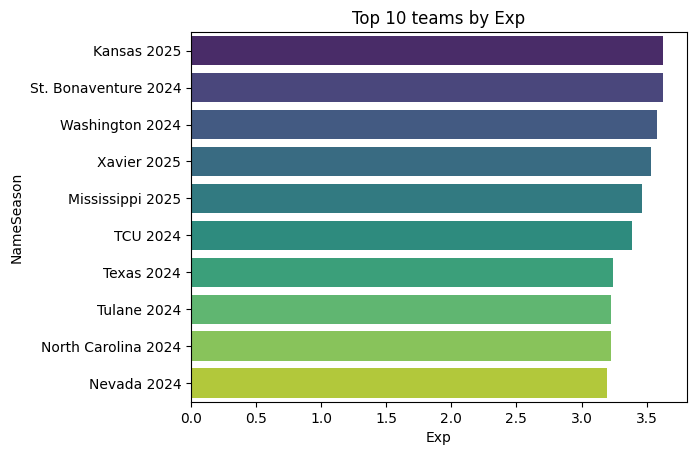

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


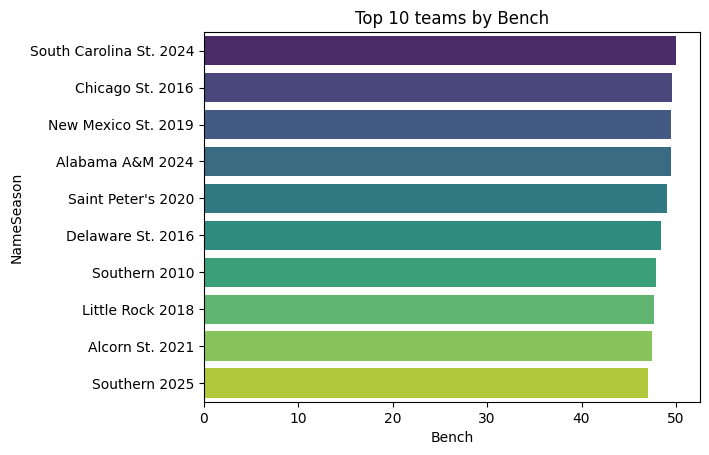

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


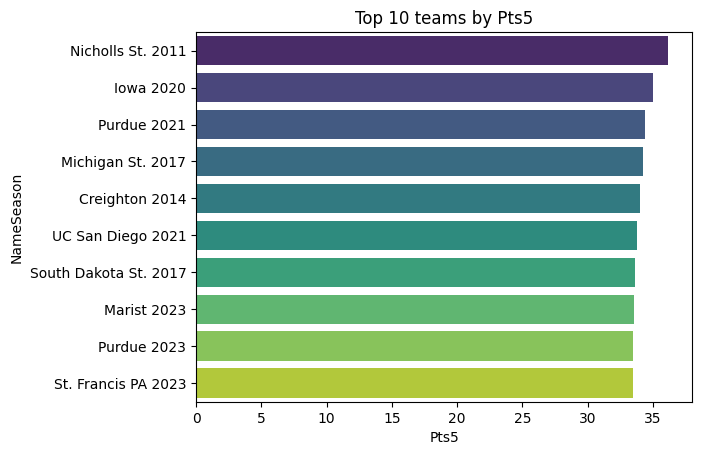

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


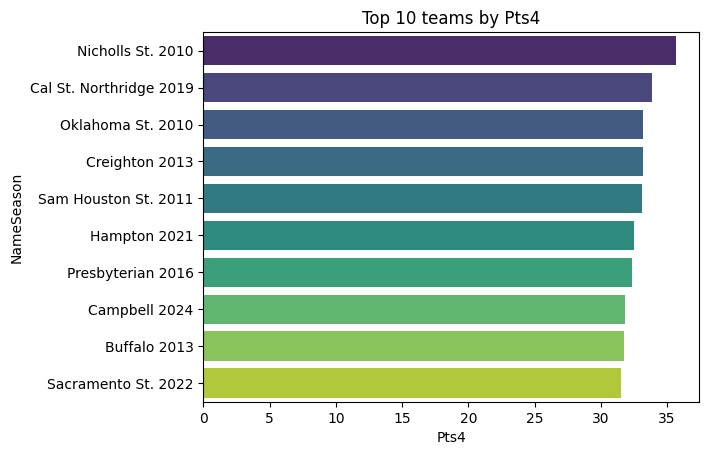

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


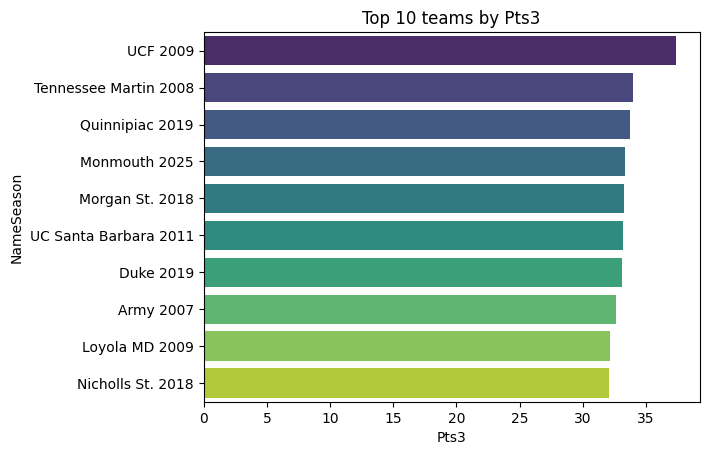

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


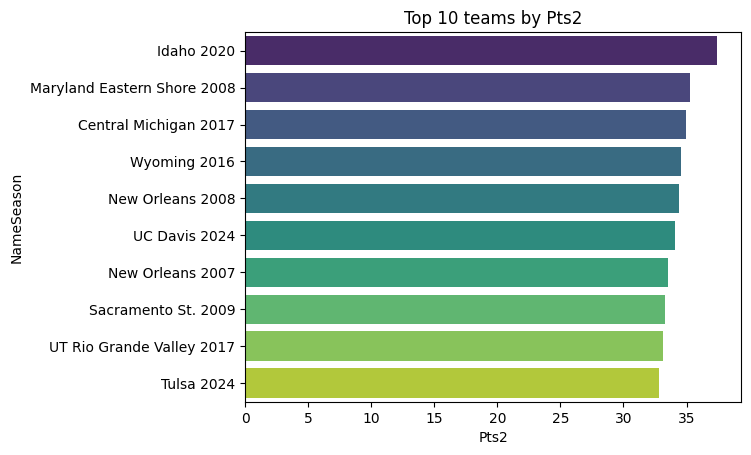

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


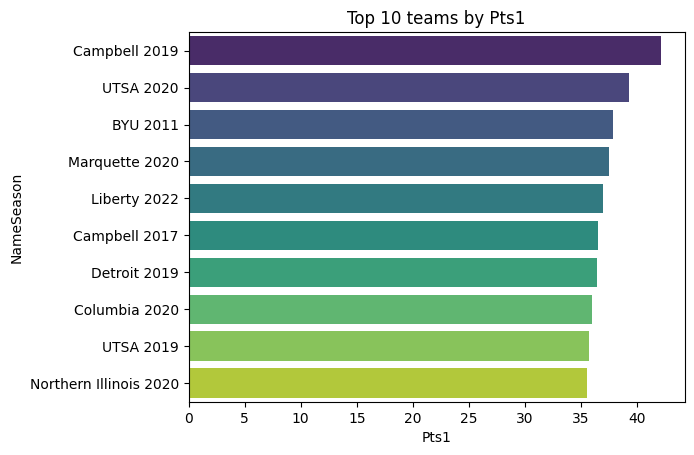

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


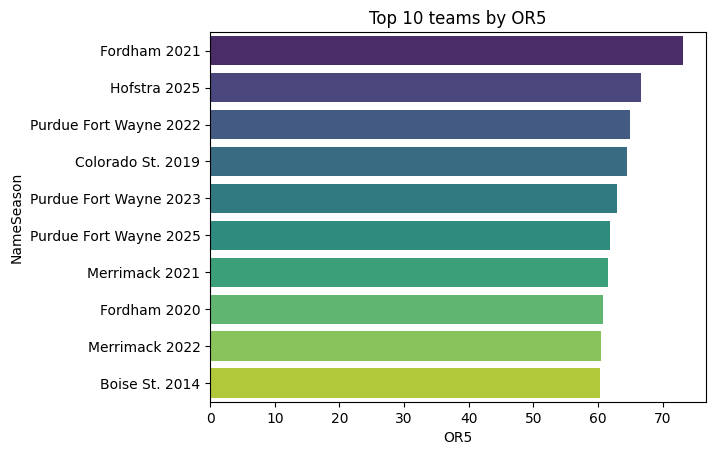

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


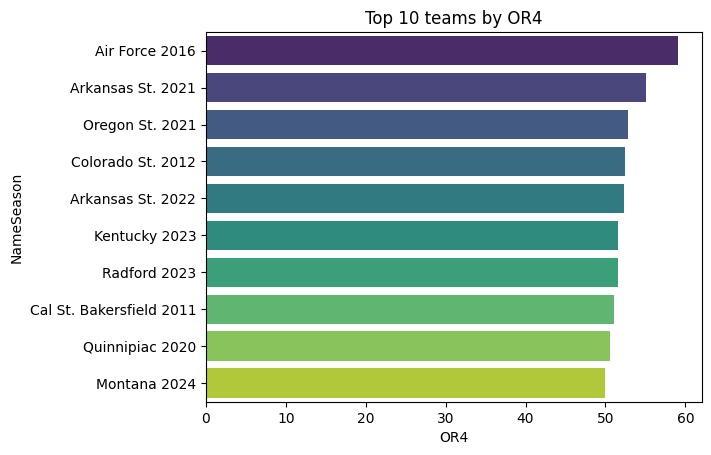

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


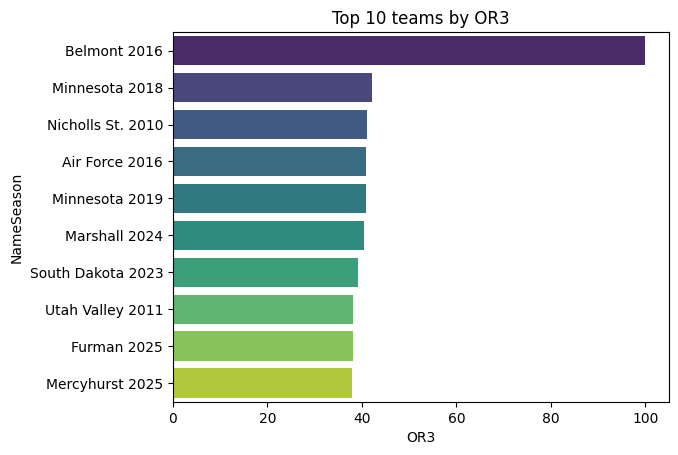

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


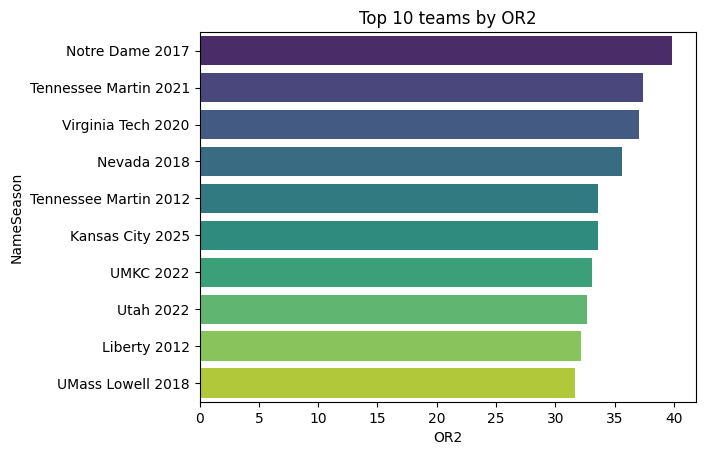

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


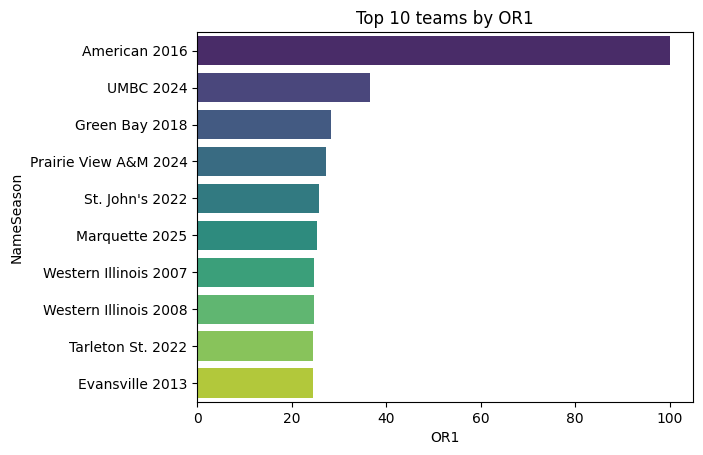

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


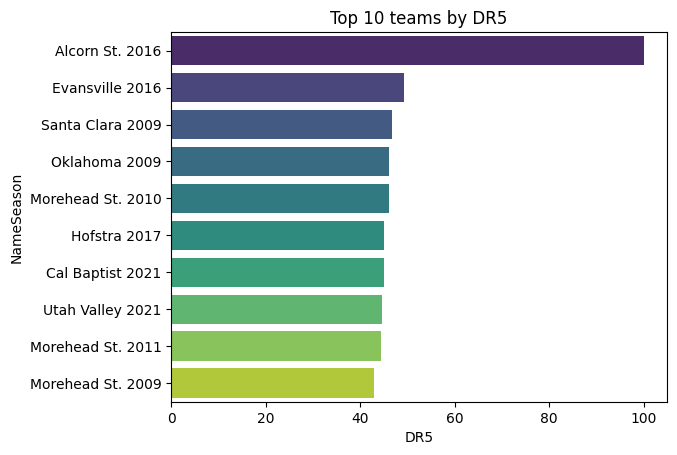

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


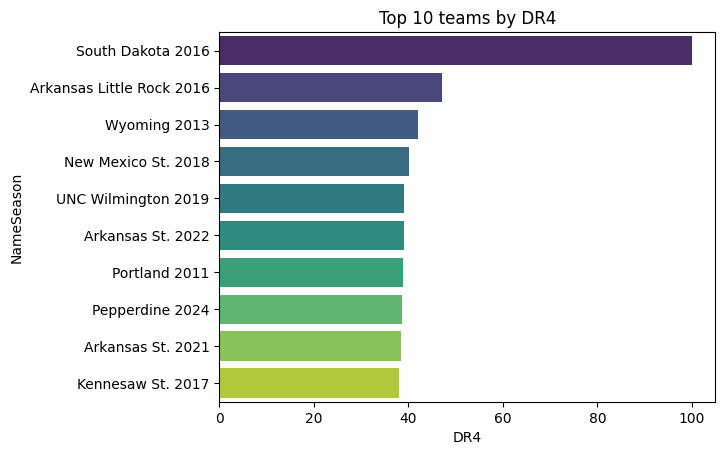

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


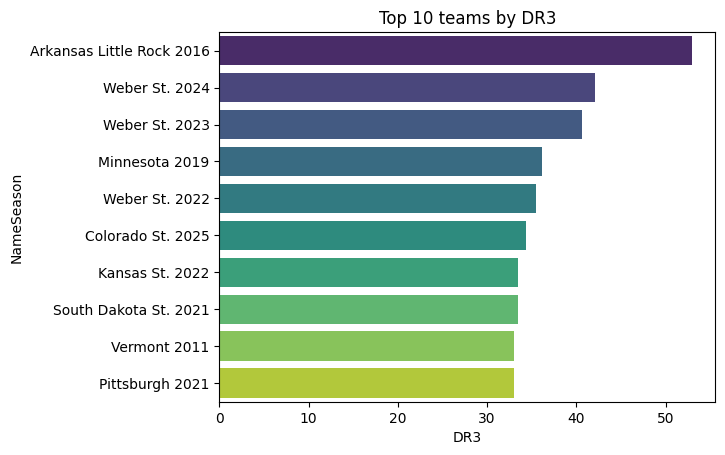

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


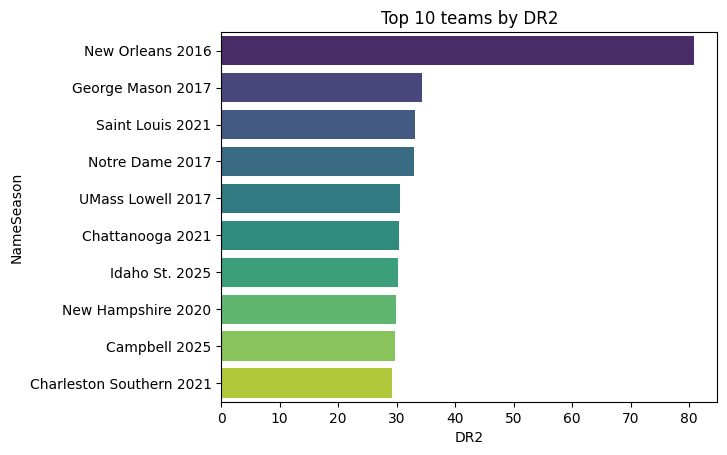

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/200071408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


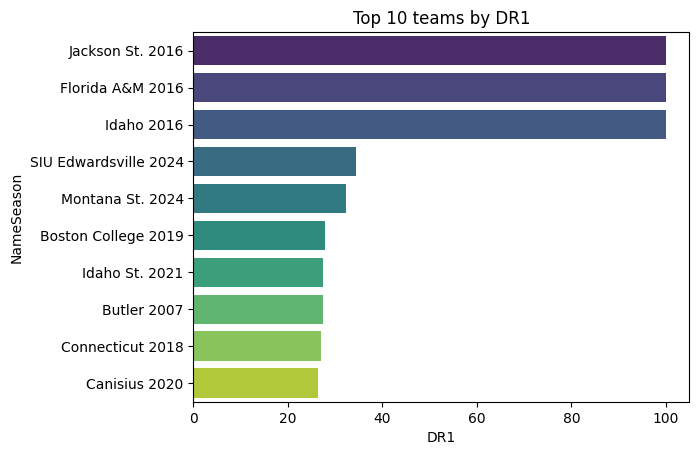

In [13]:
for col in numerical:
    top_10=demofinal.nlargest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()


/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


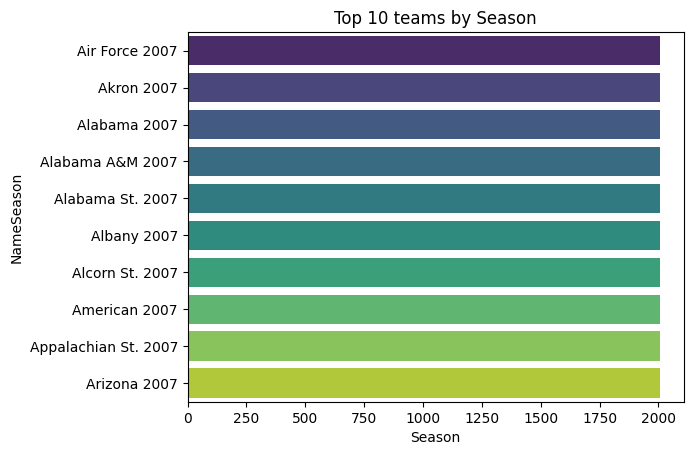

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


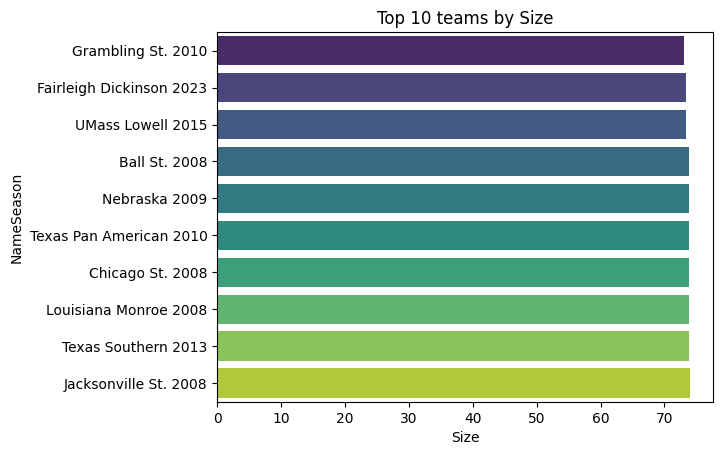

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


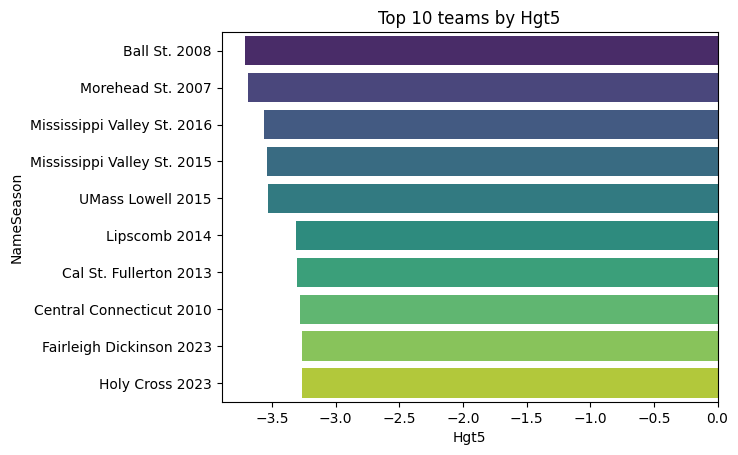

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


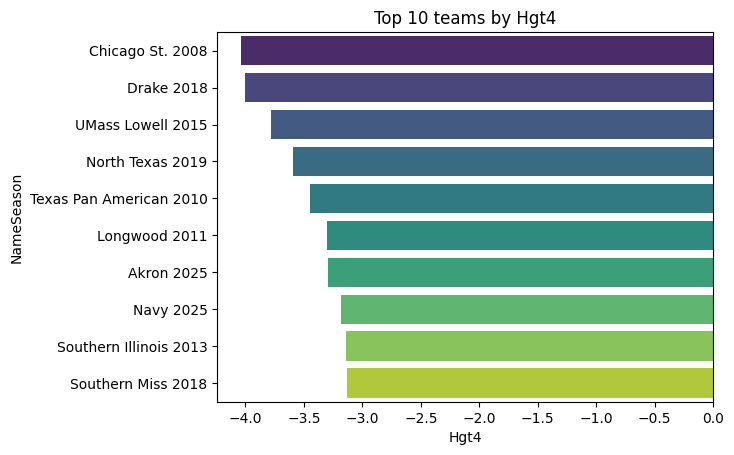

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


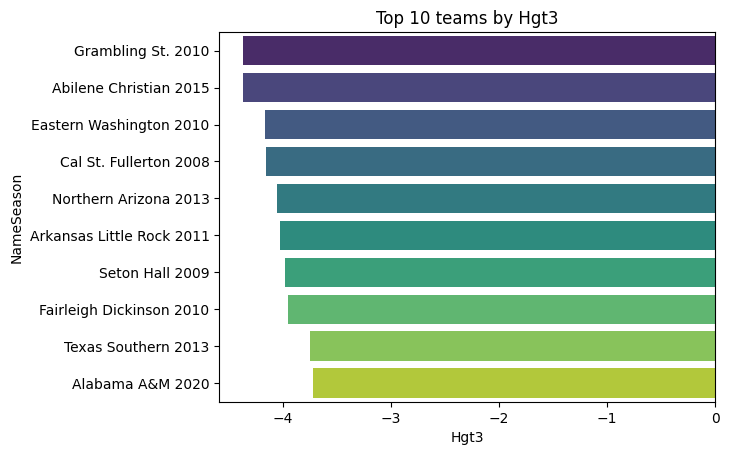

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


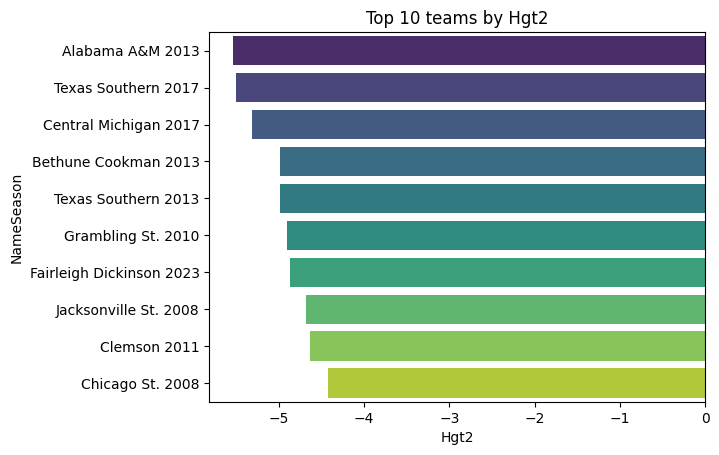

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


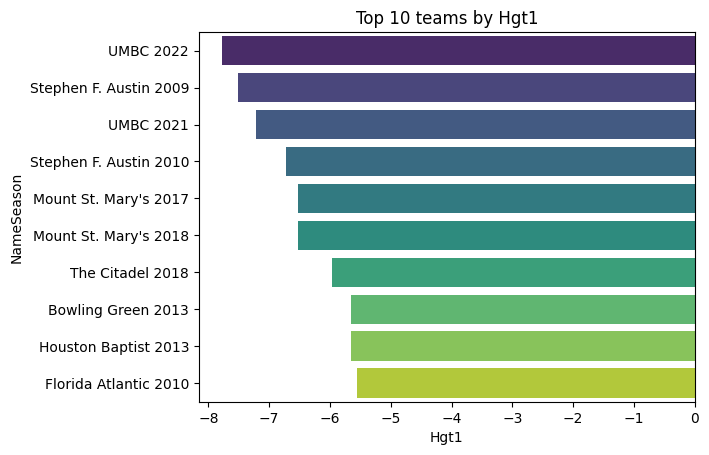

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


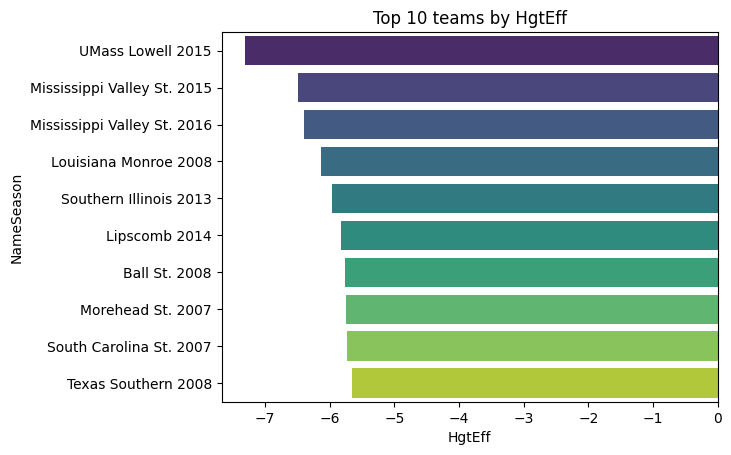

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


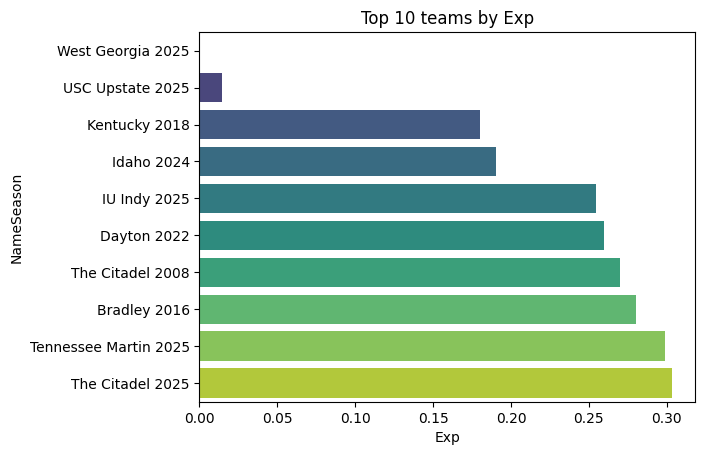

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


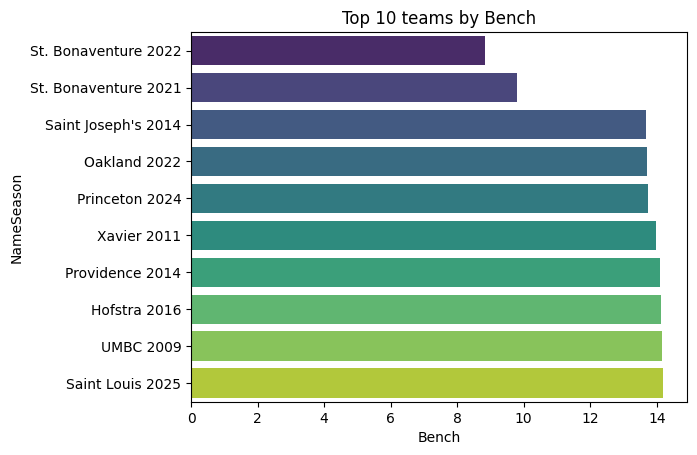

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


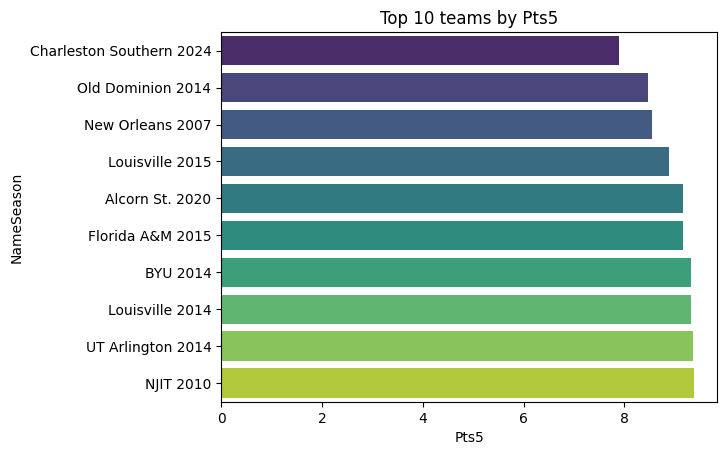

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


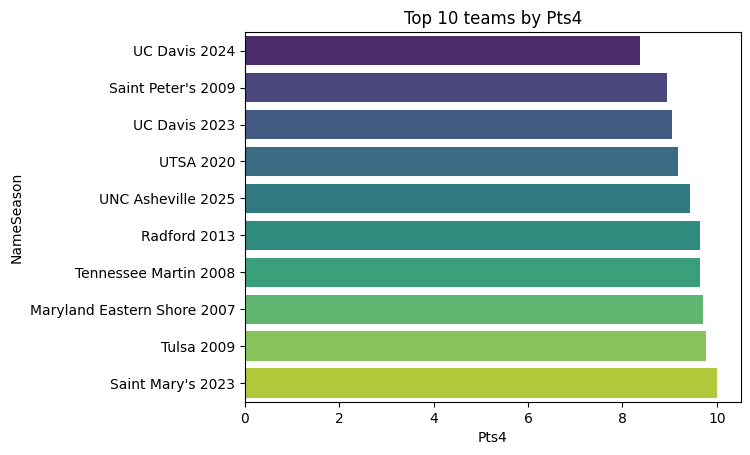

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


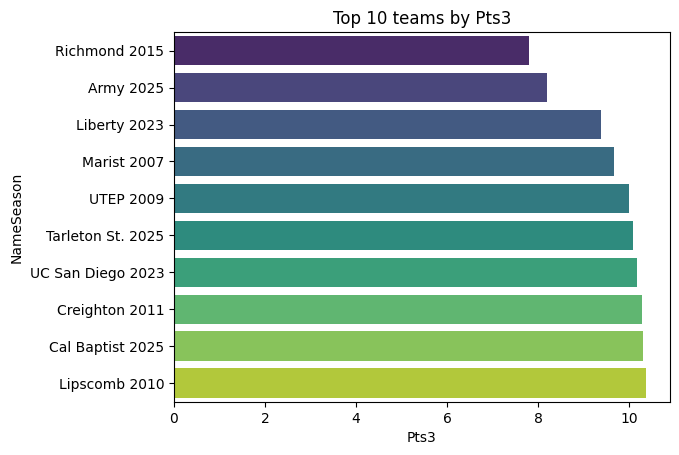

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


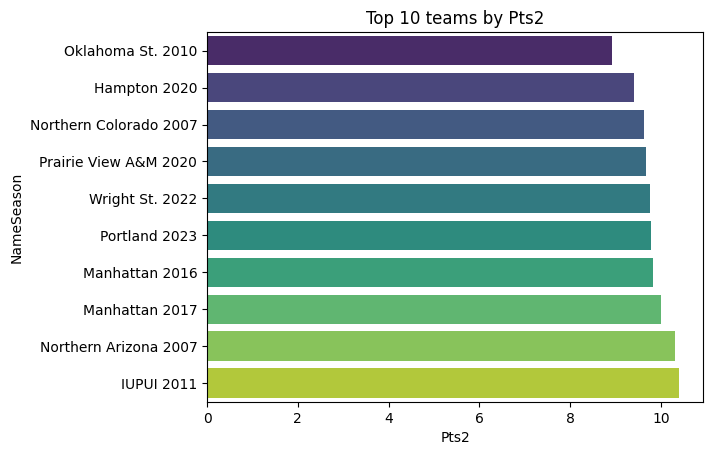

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


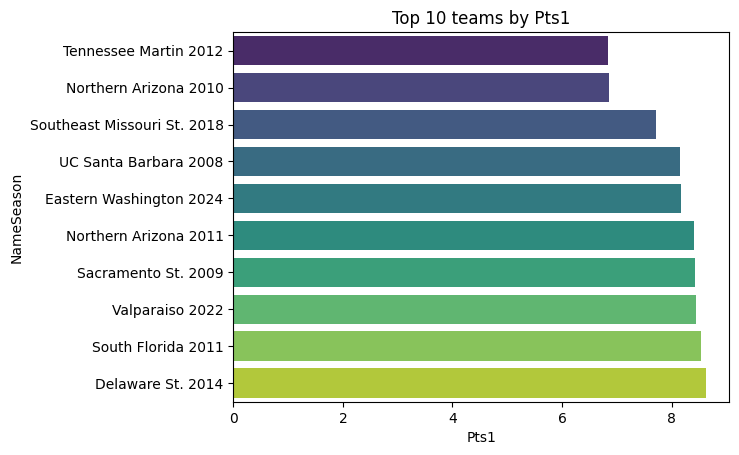

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


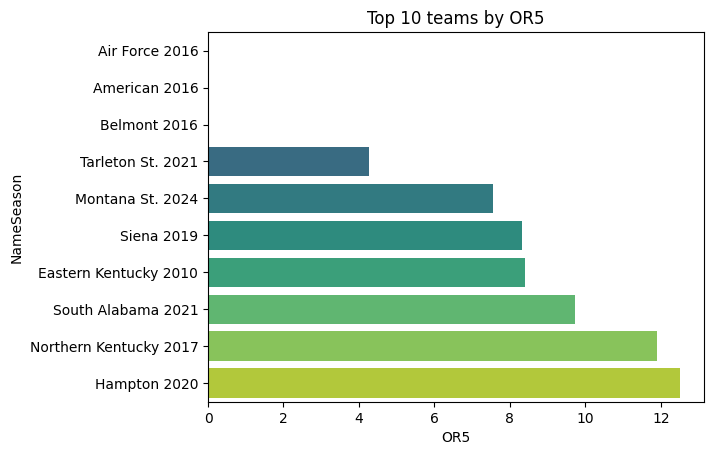

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


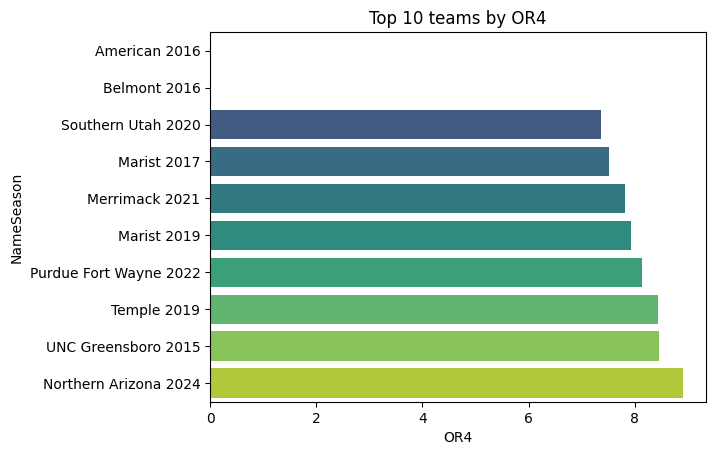

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


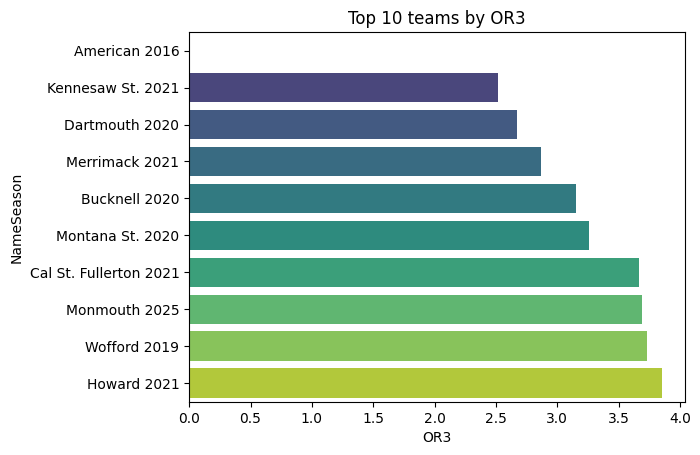

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


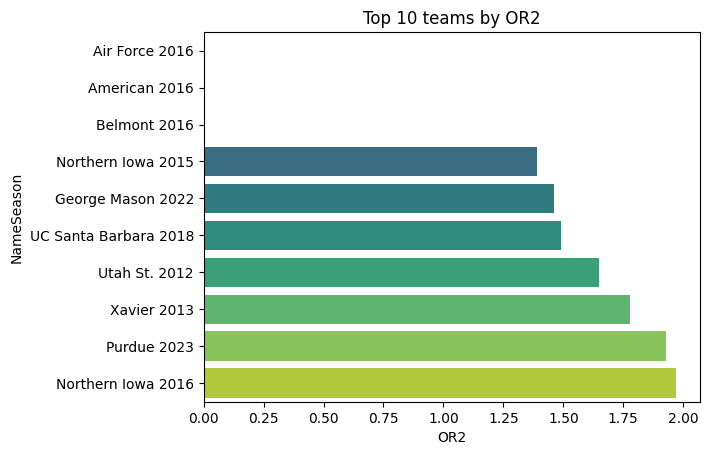

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


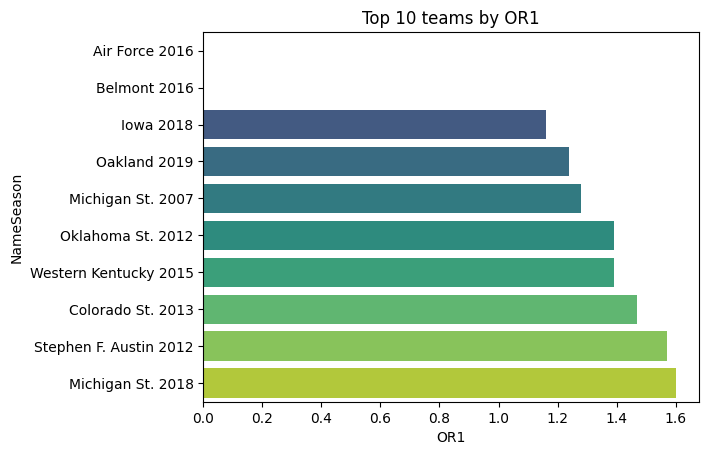

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


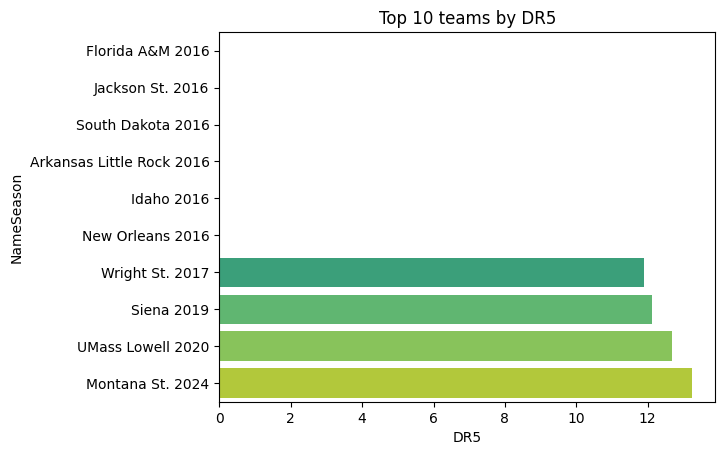

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


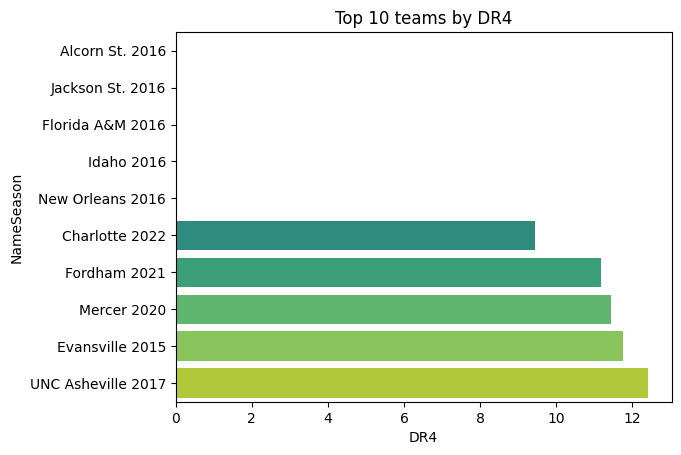

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


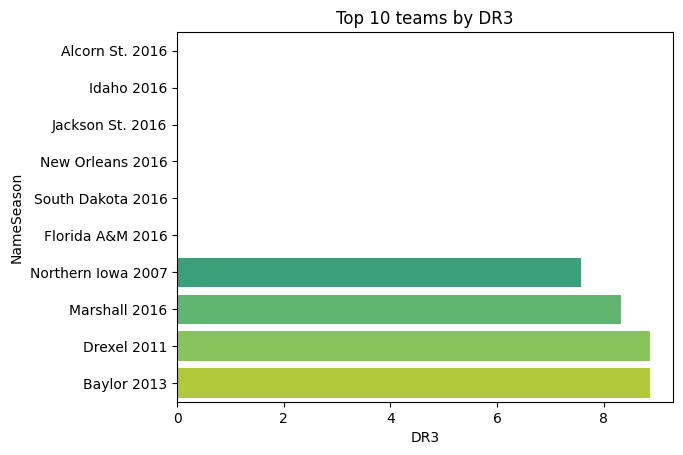

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


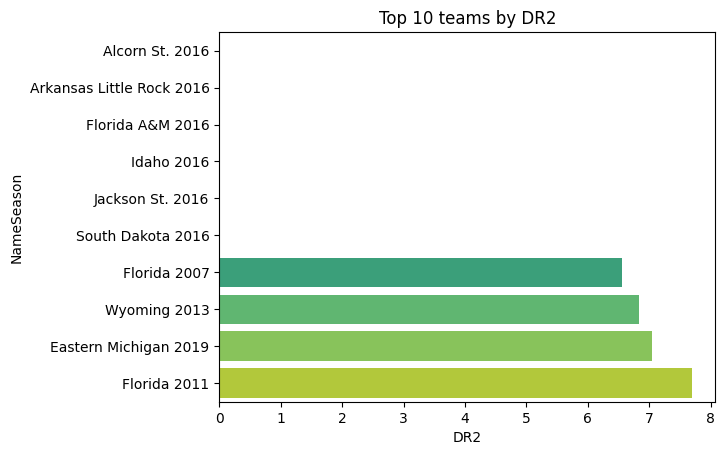

/var/folders/2x/nf0lp8t90h3dqk26_6q9tztr0000gn/T/ipykernel_57278/647340855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')


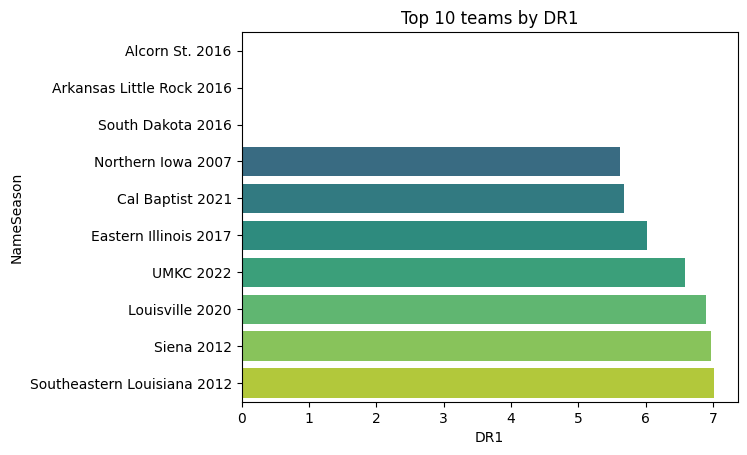

In [14]:
for col in numerical:
    top_10=demofinal.nsmallest(10, col)
    for index,row in top_10.iterrows():
        top_10.at[index, 'NameSeason']= f"{row['TeamName']} {row['Season']}"
    sns.barplot(x=top_10[col],y=top_10['NameSeason'], palette='viridis')
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

We run into the same problem as before with teams that opted out of the pandemic year.
Because those teams do not have rosters (and therefore Size values of 0.0), we can easily drop them.

In [15]:
demofinal=demofinal[demofinal['Size'] > 0.0]

In [16]:
demofinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6660 entries, 0 to 6669
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    6660 non-null   int64  
 1   TeamName  6660 non-null   object 
 2   Size      6660 non-null   float64
 3   Hgt5      6660 non-null   float64
 4   Hgt4      6660 non-null   float64
 5   Hgt3      6660 non-null   float64
 6   Hgt2      6660 non-null   float64
 7   Hgt1      6660 non-null   float64
 8   HgtEff    6660 non-null   float64
 9   Exp       6660 non-null   float64
 10  Bench     6660 non-null   float64
 11  Pts5      6660 non-null   float64
 12  Pts4      6660 non-null   float64
 13  Pts3      6660 non-null   float64
 14  Pts2      6660 non-null   float64
 15  Pts1      6660 non-null   float64
 16  OR5       6660 non-null   float64
 17  OR4       6660 non-null   float64
 18  OR3       6660 non-null   float64
 19  OR2       6660 non-null   float64
 20  OR1       6660 non-null   float64
 

Correlation Analysis

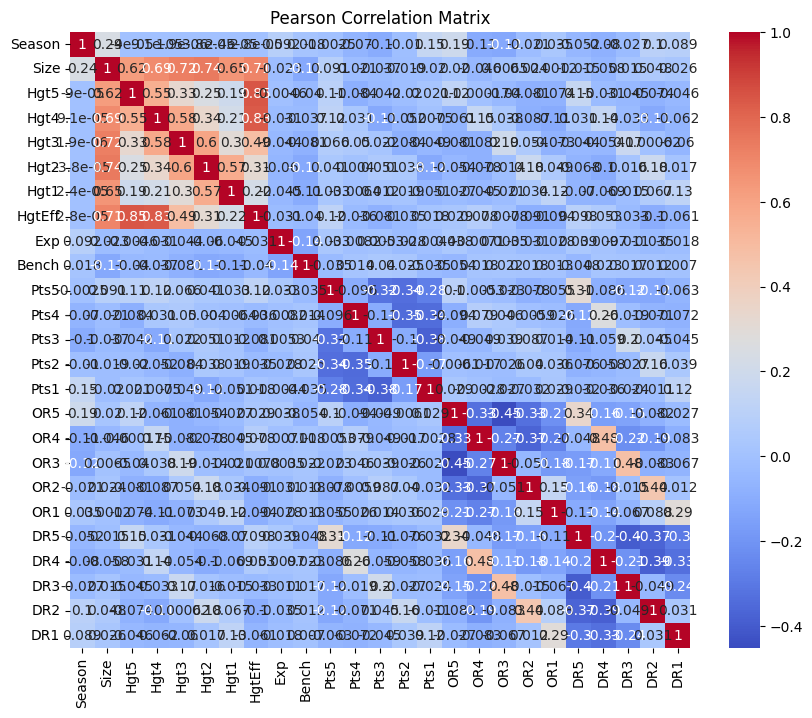

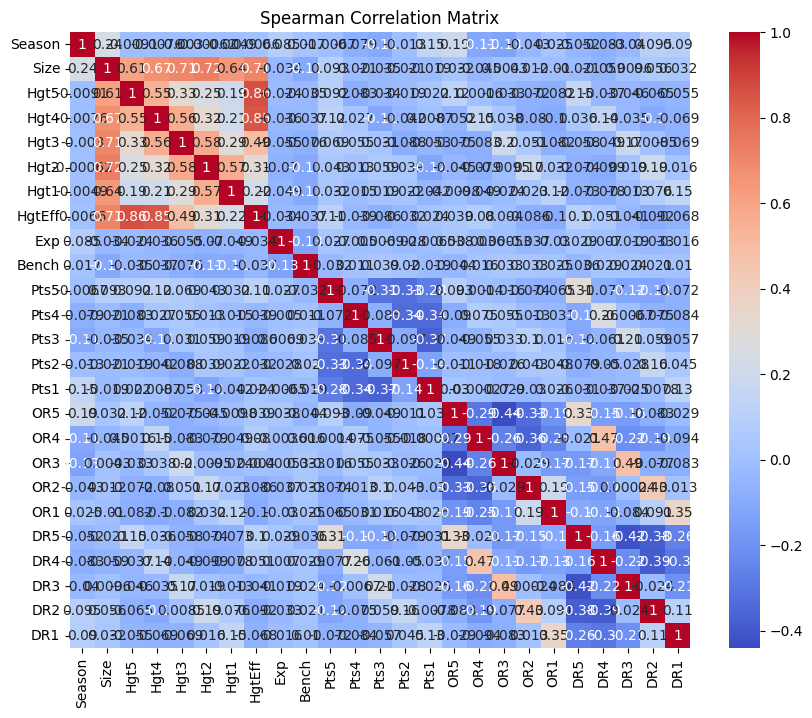

In [17]:
correlators=numerical
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()